<a href="https://colab.research.google.com/github/kokchun/Python-course-AI22/blob/main/Exercises/E10-numpy.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

# Numpy exercises

---
These are introductory exercises in Python with focus in **Numpy**.

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your answers in a neat way using <b>f-strings</b>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Dice simulations (*)

Simulations of one die,  

&nbsp; a) Calculate theoretical mean of a dice (six-sided) (*)

&nbsp; b) Now do simulations of

- 10
- 100
- 1000
- 10000
- 100000
- 1000000
- 10000000

number of dices and plot their means. (*)

<details>

<summary>Answer </summary>

a)
```
3.5
```

b) 

<img src="../Assets/numpy_1b.png" width = 300>

</details>




In [2]:
#a) 

import numpy as np

sides_of_dice= np.array([1, 2, 3, 4, 5, 6])

theoretical_mean_dice = np.sum(sides_of_dice)/sides_of_dice.size      # because sides_of_dice is a numpy array, the size attribute of numpy can be used on it.

print(sides_of_dice)
print(sides_of_dice.size)
print(f"{theoretical_mean_dice = }")

[1 2 3 4 5 6]
6
theoretical_mean_dice = 3.5


In [ ]:
#b)
import matplotlib.pyplot as plt

n = 10
list_of_means = []
list_of_dicethrows = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
for list in range(7):
    ten = np.random.randint(1,6,n)
    n *= 10
    list_of_means.append(np.sum(ten)/np.size(ten))


plt.plot(list_of_means, '-*')
plt.title("Theoretical means for different number of rolls")
plt.xticks([0, 1, 2, 3, 4, 5, 6], [10, 100, 1000, 10000, 100000, 1000000, 10000000])
plt.xlabel("Number of dice rolls")
plt.ylabel("Theoretical mean")



--- 
## 2. Several dices (**)

&nbsp; a) Make a sample space for the sum of two dices, i.e. all possible outcomes of these dices. (*)

&nbsp; b) Count the number of each values in the sample space (*)

&nbsp; c) Now calculate the frequency $f_i$ for each unique value. Also check that the sum of frequencies sums to 1, i.e. $\sum_i f_i = 1$. (*)

&nbsp; d) Make a bar chart of the sum of two dices, with frequencies in y and unique values in x. This is a probability distribution of the sum of your two dices. (*)

&nbsp; e) Now make barplots in subplots of sum of dices for 1 dice, 2 dices, 3 dices and 4 dices. What is the pattern that you see? (**)

<details>

<summary>Hint</summary>

a) 

Here are some potentially useful methods:

```py

np.meshgrid(), np.add.reduce(), np.unique()

```

c)

Divide by the total number of outcomes


</details>

<details>

<summary>Answer</summary>


a) 

Sample space

```
[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]
```

b) 

Unique values:
```
[ 2  3  4  5  6  7  8  9 10 11 12]
```

Count: 
```
[1 2 3 4 5 6 5 4 3 2 1]
```

c)

```
[0.028 0.056 0.083 0.111 0.139 0.167 0.139 0.111 0.083 0.056 0.028]
```

d) 


<img src="../Assets/numpy2d.png" width = 300>


e) 

<img src="../Assets/numpy2e.png" width = 500>


We see that when we sum several uniformly distributed random variables we will approach the normal distribution. This is called the central limit theorem, which we will come back to in the statistics course.

</details>

In [ ]:
#a) 
import numpy as np
import matplotlib.pyplot as plt
# Step a) Create a sample space for the sum of two dice rolls.
dice_values = np.arange(1, 7)  # Values on a single die
outcomes = np.meshgrid(dice_values, dice_values)
sum_of_two_dice = np.add.reduce(outcomes) # Vid två 2 D arrayer som summeras, tar den motsvarande element i varje och summerar. 
                                          # Om det däremot var en 2D array, behövde man skriva axis = 0 för att summera i x-led osv
# print(dice_values)            # Först array av värden
# print(outcomes)               # Gör så att vi får de i x och y axel, samt i en grid(för att kunna addera sen och få alla utfall (frequency table))
print(sum_of_two_dice)          # Frequency table - alla möjliga utfall i en grid



In [ ]:
#b)
unique_values = np.unique(sum_of_two_dice)
print(unique_values)

# unique_values, counts = np.unique(sum_of_two_dice, return_counts=True)  # Går också att komma åt unique values samtidigt
_, counts = np.unique(sum_of_two_dice, return_counts=True)        # default för return_counts är False, men om man sätter True får man ut det
 
print(counts)


In [ ]:
#c)

sum_all_rolls = np.sum(counts)

probability_array = counts/sum_all_rolls               # delar alla tal i counts array med summan och ger ny array med alla värden

print(probability_array)


In [ ]:
#d)
plt.bar(unique_values, probability_array)
plt.title("Frequency distribution")
plt.xlabel("Unique values")
plt.ylabel("Probability")
plt.xticks(unique_values)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a sample space for the sum of one, two, three, and four dice rolls.
dice_values = np.arange(1, 7)  # Values on a single die

# Create a sample space for the sum of one, two, three, and four dice rolls.
outcomes_1 = dice_values  # Outcomes for one die roll
outcomes_2 = np.meshgrid(outcomes_1, outcomes_1)  # Outcomes for two dice rolls
outcomes_3 = np.meshgrid(outcomes_1, outcomes_2)  # Outcomes for three dice rolls
outcomes_4 = np.meshgrid(outcomes_1, outcomes_3)  # Outcomes for four dice rolls


#sums 
sums_1 = outcomes_1
sums_2 = np.add.reduce(outcomes_2)
sums_3 = np.add.reduce(outcomes_3)
sums_4 = np.add.reduce(outcomes_4)

# Calculate unique values and counts for each case
unique_values_1, counts_1 = np.unique(sums_1, return_counts=True)
unique_values_2, counts_2 = np.unique(sums_2, return_counts=True)
unique_values_3, counts_3 = np.unique(sums_3, return_counts=True)
unique_values_4, counts_4 = np.unique(sums_4, return_counts=True)

# sum of all rolls
sum_all_rolls1 = sum(counts_1)
sum_all_rolls2 = sum(counts_2)
sum_all_rolls3= sum(counts_3)
sum_all_rolls4 = sum(counts_4)

# probability_arrays
probability_array_1 = counts_1 / sum_all_rolls1
probability_array_2 = counts_2 / sum_all_rolls2
probability_array_3 = counts_3 / sum_all_rolls3
probability_array_4 = counts_4 / sum_all_rolls4


fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Subplot 1
axs[0, 0].bar(unique_values_1, probability_array_1)
axs[0, 0].set_title('One die')

# Subplot 2
axs[0, 1].bar(unique_values_2, probability_array_2)
axs[0, 1].set_title('Two dice')

# Subplot 3
axs[1, 0].bar(unique_values_3, probability_array_3)
axs[1, 0].set_title('Three dice')

# Subplot 4
axs[1, 1].bar(unique_values_4, probability_array_4)
axs[1, 1].set_title('Four dice')

plt.tight_layout()
plt.show()

--- 
## 3. Monte Carlo simulation (**)

This task has been done in earlier exercise, but now you should do this without any loops. Note that this has enormous performance gain compared to using loops. 

&nbsp; a) Simulate 500000 uniformly distributed points between -1 and 1, $X\sim U(-1,1)$. Now calculate the Euclidean distances between each point and the origin (0,0), $d_i = \sqrt{x_i^2 + y_i^2}$. For $d_i < 1$ plot the point with one color, and for $d_i > 1$ plot the point in another color, $i = \{1,\ldots, 500000\}$.  (**)

&nbsp; b) Calculate the fraction between number of inner points and number of outer points. What do you this will converge to when number of points reaches infinity? (**)


<details>

<summary>Hint</summary>

a) 

Read about numpy random and see if there are some useful methods to use. Also read about 

```
np.linalg.norm()
```

b)

Think in terms of theoretical areas.

</details>

<details>

<summary>Answer</summary>


a) 

<img src="../Assets/MC_simulation_500k.png" width = 300>


b) 

0.784724

No answer here, try to prove it theoretically. 


</details>

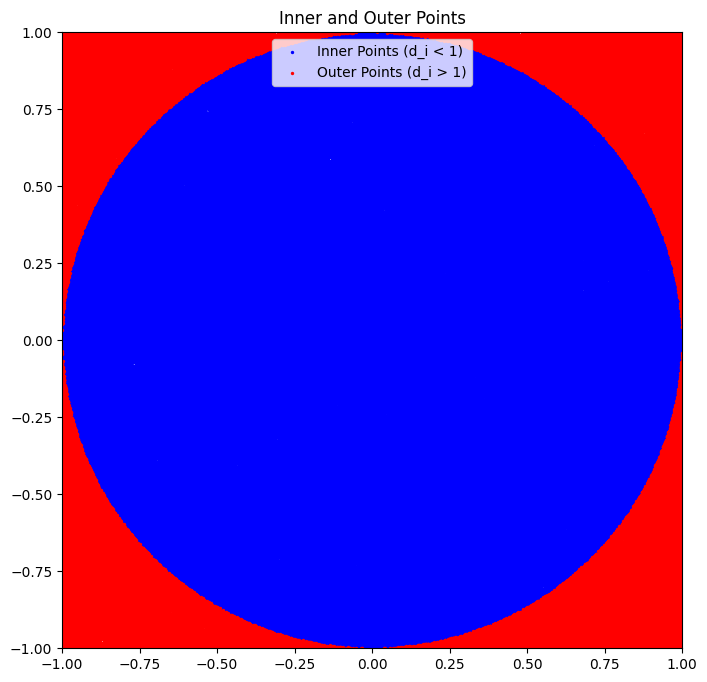

Fraction (inner points / outer points): 3.656794262829468


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# a) Simulate 500,000 uniformly distributed points between -1 and 1
num_points = 500000
random_points = np.random.uniform(-1, 1, (num_points, 2))

# Calculate the Euclidean distances
euclidean_distances = np.linalg.norm(random_points, axis=1)

# Define conditions for inner and outer points
inner_points = random_points[euclidean_distances < 1]
outer_points = random_points[euclidean_distances > 1]

# Plot inner points in one color and outer points in another color
plt.figure(figsize=(8, 8))
plt.scatter(inner_points[:, 0], inner_points[:, 1], color='blue', s=2, label='Inner Points (d_i < 1)')
plt.scatter(outer_points[:, 0], outer_points[:, 1], color='red', s=2, label='Outer Points (d_i > 1)')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.legend()
plt.title("Inner and Outer Points")

# Show the plot
plt.show()

# b) Calculate the fraction between the number of inner points and the number of outer points
num_inner_points = inner_points.shape[0]
num_outer_points = outer_points.shape[0]
fraction = num_inner_points / num_outer_points

print("Fraction (inner points / outer points):", fraction)


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---